In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

In [2]:
# data source

infos = 'https://raw.githubusercontent.com/olivierla412/Files/main/breast%20cancer.csv'

In [3]:
# Get the csv data here and print head

data = pd.read_csv(infos)
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
# Print summary

print('\n Shape     ------->',data.shape,'\n')
print('Each column and data type and its count:','\n')
print(data.info())


 Shape     -------> (569, 33) 

Each column and data type and its count: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  text

In [5]:
# Drop Alert1 : Unnamed: 32  column has all nulls safe to remove the column

data = data.drop(['Unnamed: 32'],axis=1)

In [6]:
## Let's see the DataFrame statistic

data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
## checking for null values

#data.isnull().sum()

In [9]:
## To see the count quantitis of (B) and (M)

print('Belign Tumor(B) ===>',data.diagnosis.value_counts()[0])
print('Malignant Tumor(M) ===>',data.diagnosis.value_counts()[1])

Belign Tumor(B) ===> 357
Malignant Tumor(M) ===> 212


<function matplotlib.pyplot.show(close=None, block=None)>

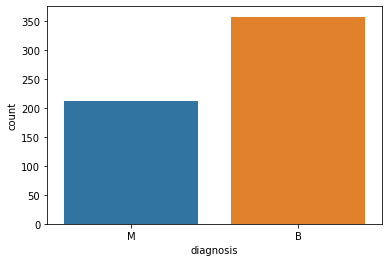

In [11]:
# Plot each Class frequency
sns.countplot(x='diagnosis',data=data)
plt.show

In [12]:
data.shape

(569, 32)

### Visualize the data distribution and analyse the skewness or __Outliers__

In [18]:
# We don't need to visualize the label, seperating only features into new DataFrame

df_features = data.drop('diagnosis', axis=1)

df_features_1 = df_features.drop('id', axis=1)

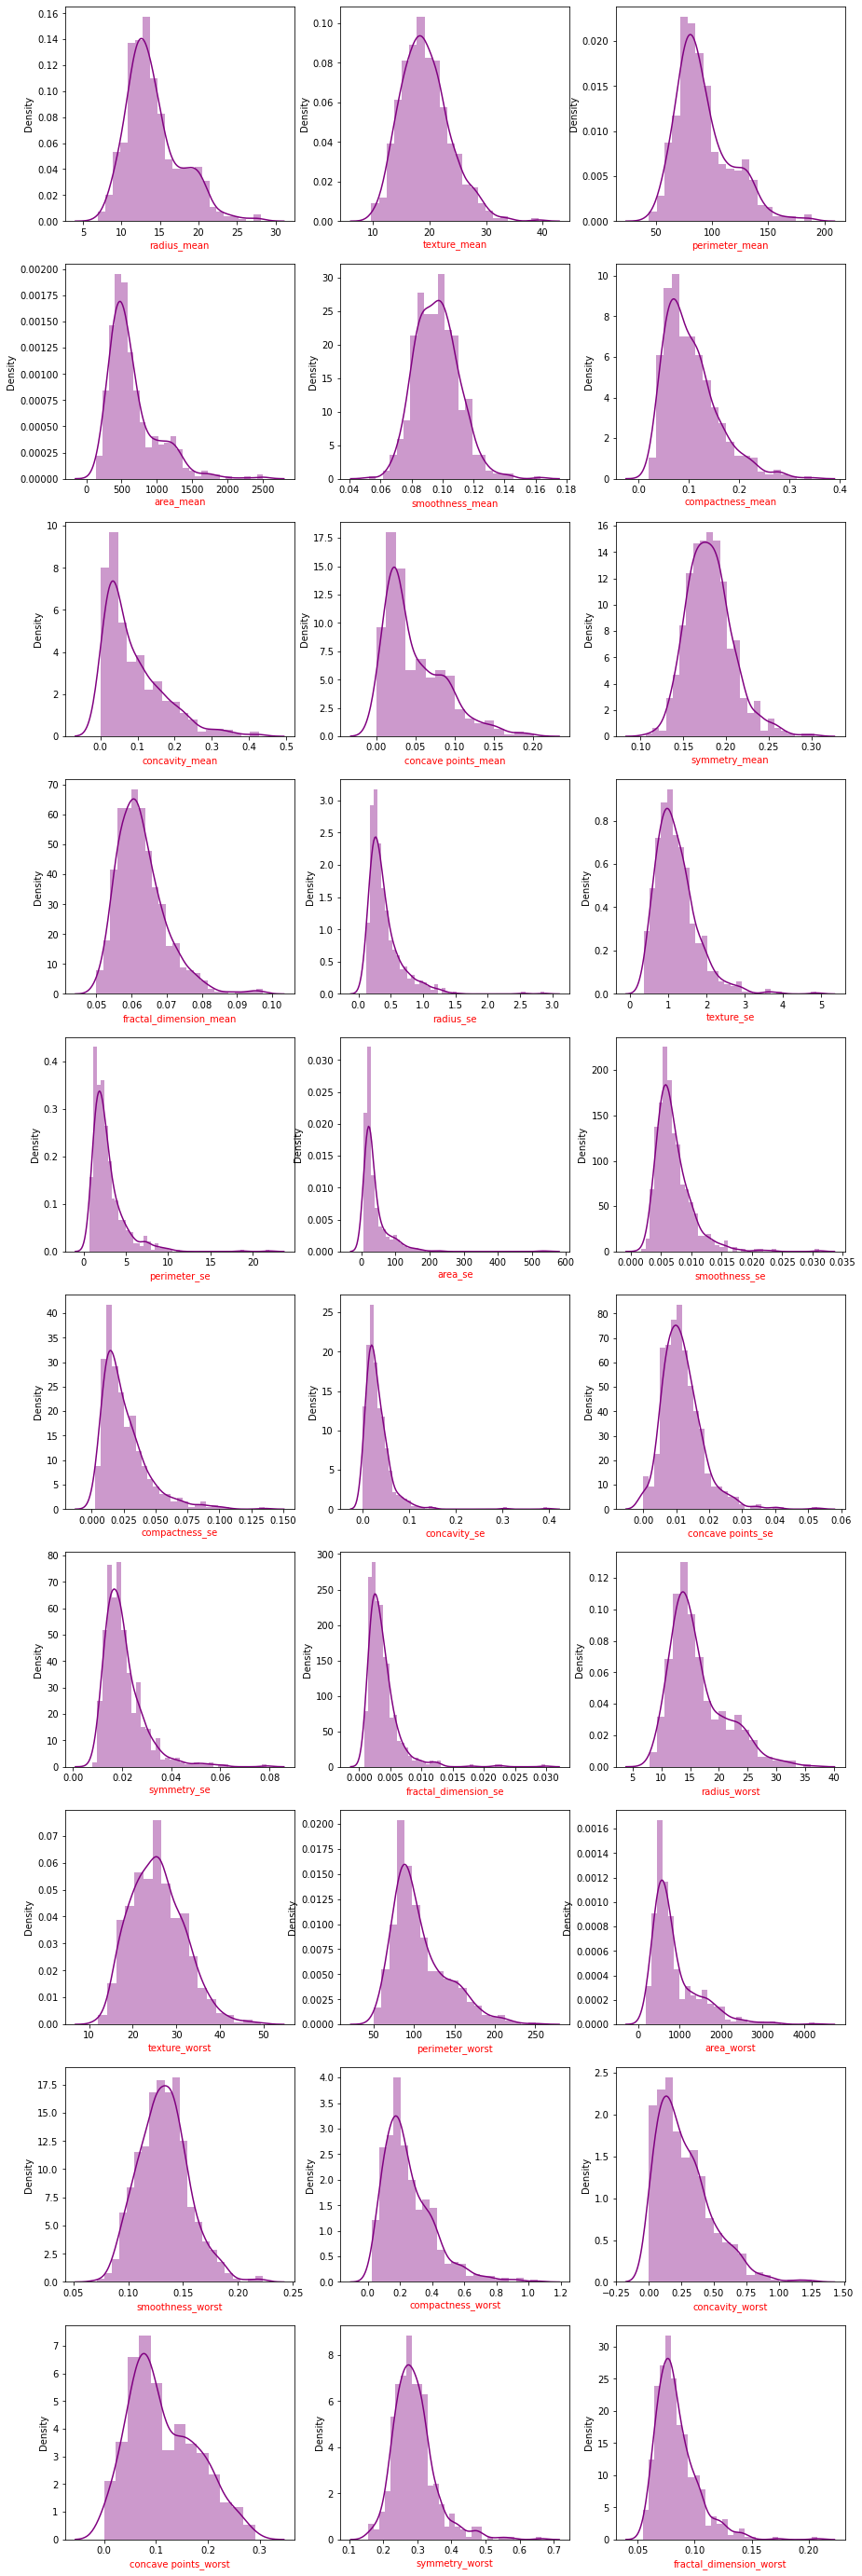

In [21]:
## let's plot data distribution using  distplot
plt.figure(figsize=(15,50))
plotnumber = 1

for column in df_features_1:
    if plotnumber <= 30:
        ax = plt.subplot(10,3,plotnumber)
        sns.distplot(df_features_1[column],color='purple')
        plt.xlabel(column,color ='r',fontsize = 10)
    plotnumber+=1
plt.show()    
    

In [19]:
df_features_1.shape

(569, 30)

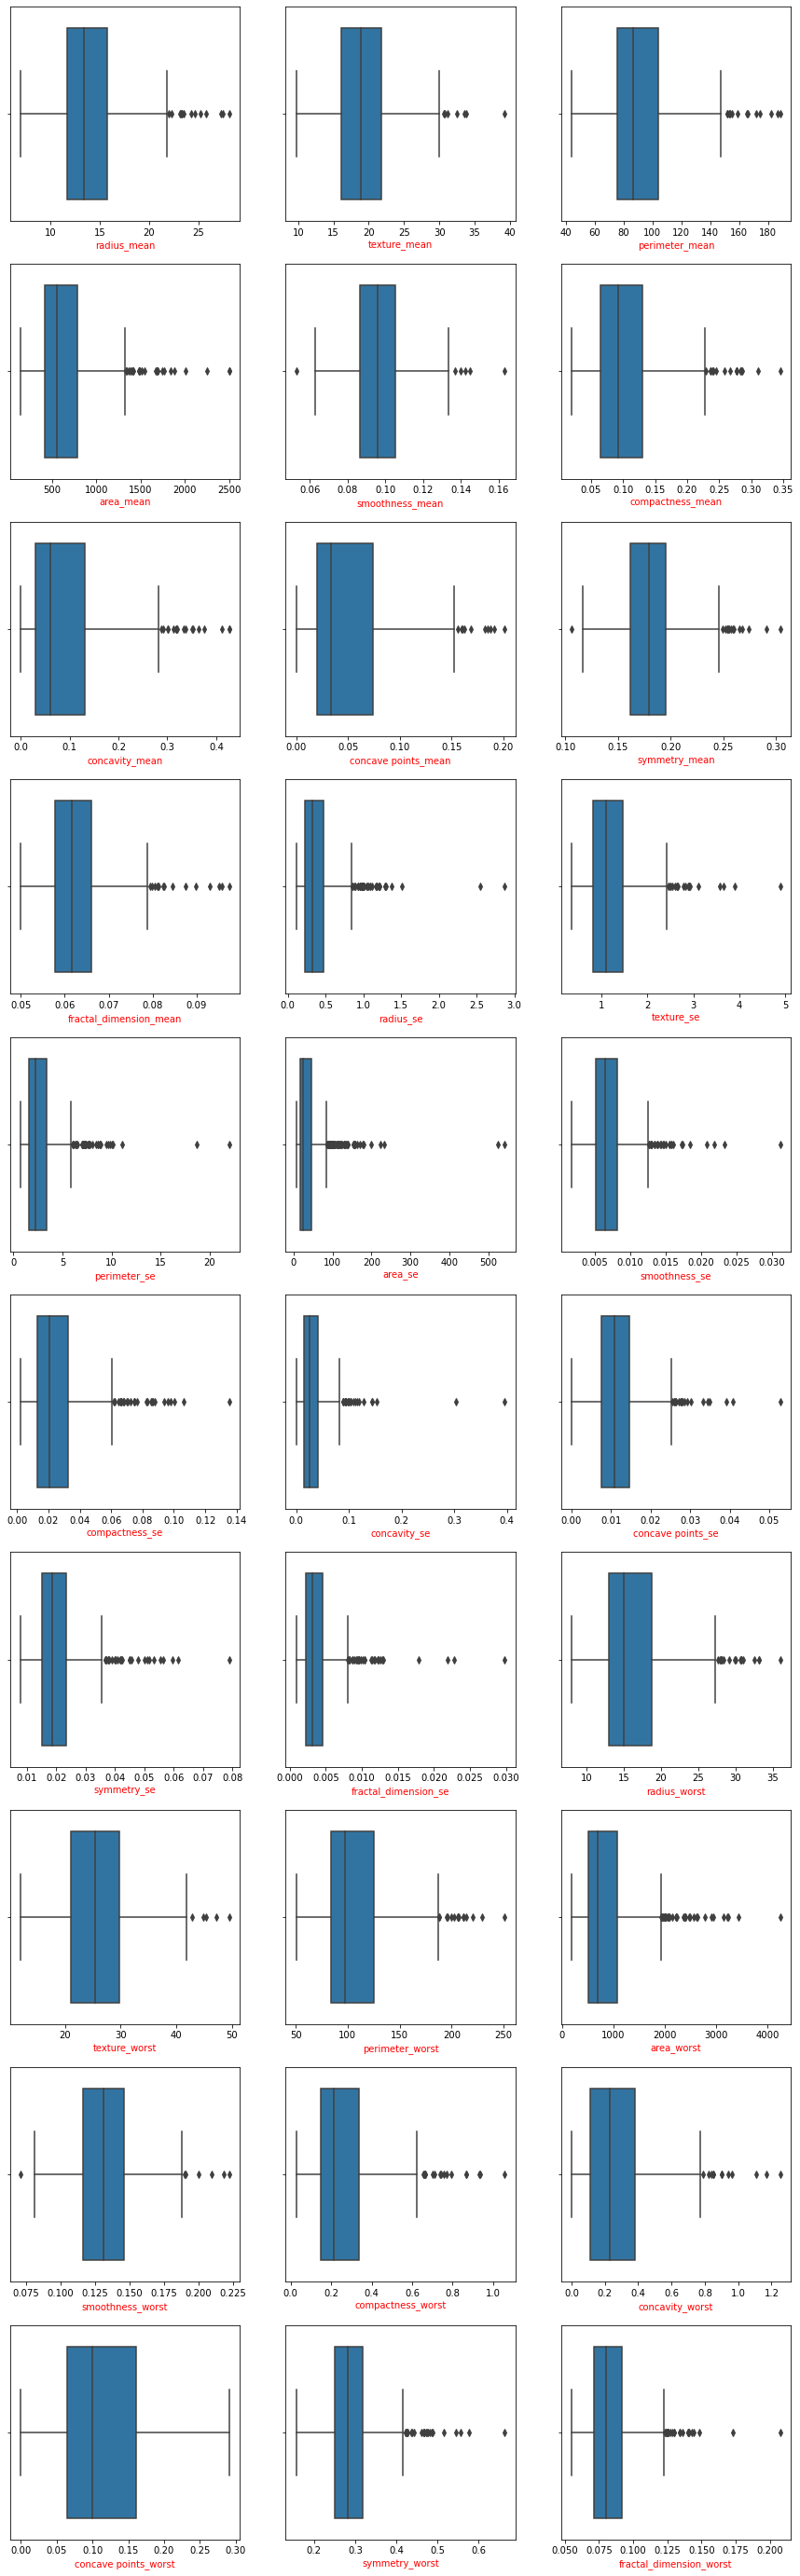

In [35]:
## let's plot data distribution

plt.figure(figsize=(15, 50))

graph = 1

for column in df_features_1:
    if graph <= 30:
        ax = plt.subplot(10,3,graph)
        sns.boxplot(df_features_1[column],orient='h')
        plt.xlabel(column,color ='r',fontsize = 10)
    graph+=1
plt.show()   

### Outlier Dectection Formula

##### __Higher side ===> Q3 + (1.5 * IQR)__
##### __lower side ===> Q1 - (1.5 * IQR)__
##### __IQR = Inter Quantile Rate = Q3 - Q1__

In [36]:
## Find the IQR ( Inter Quantile Range) to identify oulier

# 1st quantile
q1 = data.quantile(0.25)

# 3rd quantile
q3 = data.quantile(0.75)

#IQR 
iqr = q3 - q1

In [37]:
# Validation one outlier
rad_mean_high = (q3.radius_mean + (1.5 * iqr.radius_mean))
rad_mean_high

21.9

##### This means from the column __radius_mean__ all the record values greater __than 21.9__ (radius_mean > 21.9) are Outliers

### Let's remove the Outlier Higher side 

In [38]:
index = np.where(data['radius_mean'] > rad_mean_high)
index

(array([ 82, 108, 122, 164, 180, 202, 212, 236, 339, 352, 369, 461, 503,
        521]),)

In [41]:
## just to verify at index 82 values 

data['radius_mean'].head(84)

## from the output it is 25.22 > 21.9  so True

0     17.99
1     20.57
2     19.69
3     11.42
4     20.29
      ...  
79    12.86
80    11.45
81    13.34
82    25.22
83    19.10
Name: radius_mean, Length: 84, dtype: float64

In [42]:
## Let's drop those indexes from the dataset

data = data.drop(data.index[index])

In [43]:
data.shape

(555, 32)

In [45]:
## reset the index

data.reset_index(drop=True)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
551,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
552,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
553,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [46]:
index = np.where(data['texture_mean'] > (q3.texture_mean + (1.5 * iqr.texture_mean)))
data = data.drop(data.index[index])
data.reset_index(drop=True)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
544,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
545,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
546,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [47]:
index = np.where(data['perimeter_mean'] > (q3.perimeter_mean + (1.5 * iqr.perimeter_mean)))
data = data.drop(data.index[index])
data.reset_index(drop=True)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
544,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
545,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
546,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [48]:
index = np.where(data['area_mean'] > (q3.area_mean + (1.5 * iqr.area_mean)))
data = data.drop(data.index[index])
data.reset_index(drop=True)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,925311,B,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,...,11.920,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.0000,0.1566,0.05905
534,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
535,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
536,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [49]:
index = np.where(data['compactness_mean'] > (q3.compactness_mean + (1.5 * iqr.compactness_mean)))
data = data.drop(data.index[index])
data.reset_index(drop=True)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
2,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
3,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440
4,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.3784,0.1932,0.3063,0.08368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.1048,0.2250,0.08321
522,925311,B,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,...,11.920,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.0000,0.1566,0.05905
523,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
524,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


In [52]:
index = np.where(data['concave points_mean'] > (q3['concave points_mean'] + (1.5 * iqr['concave points_mean'])))
data = data.drop(data.index[index])
data.reset_index(drop=True)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
2,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
3,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440
4,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.3784,0.1932,0.3063,0.08368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.1048,0.2250,0.08321
510,925311,B,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,...,11.920,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.0000,0.1566,0.05905
511,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
512,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


In [53]:
index = np.where(data['fractal_dimension_mean'] > (q3['fractal_dimension_mean'] + (1.5 * iqr['fractal_dimension_mean'])))
data = data.drop(data.index[index])
data.reset_index(drop=True)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
2,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
3,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440
4,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.3784,0.1932,0.3063,0.08368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.1048,0.2250,0.08321
510,925311,B,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,...,11.920,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.0000,0.1566,0.05905
511,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
512,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


In [54]:
index = np.where(data['radius_se'] > (q3.radius_se + (1.5 * iqr.radius_se)))
data = data.drop(data.index[index])
data.reset_index(drop=True)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
2,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
3,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440
4,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.3784,0.1932,0.3063,0.08368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.1048,0.2250,0.08321
493,925311,B,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,...,11.920,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.0000,0.1566,0.05905
494,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
495,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


In [55]:
index = np.where(data['texture_se'] > (q3.texture_se + (1.5 * iqr.texture_se)))
data = data.drop(data.index[index])
data.reset_index(drop=True)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
2,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
3,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.08089,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
4,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.07400,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,924964,B,10.16,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.01116,...,10.650,22.88,67.88,347.3,0.12650,0.12000,0.01005,0.02232,0.2262,0.06742
477,925277,B,14.59,22.68,96.39,657.1,0.08473,0.13300,0.102900,0.03736,...,15.480,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004
478,925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.044620,0.04304,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321
479,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.092510,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820


In [56]:
index = np.where(data['perimeter_se'] > (q3.perimeter_se + (1.5 * iqr.perimeter_se)))
data = data.drop(data.index[index])
data.reset_index(drop=True)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
2,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
3,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.08089,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
4,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.07400,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,924964,B,10.16,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.01116,...,10.650,22.88,67.88,347.3,0.12650,0.12000,0.01005,0.02232,0.2262,0.06742
474,925277,B,14.59,22.68,96.39,657.1,0.08473,0.13300,0.102900,0.03736,...,15.480,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004
475,925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.044620,0.04304,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321
476,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.092510,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820


In [57]:
index = np.where(data['area_se'] > (q3.area_se + (1.5 * iqr.area_se)))
data = data.drop(data.index[index])
data.reset_index(drop=True)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
1,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.08089,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
2,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.07400,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
3,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.05985,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
4,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.09353,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,924964,B,10.16,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.01116,...,10.650,22.88,67.88,347.3,0.12650,0.12000,0.01005,0.02232,0.2262,0.06742
455,925277,B,14.59,22.68,96.39,657.1,0.08473,0.13300,0.102900,0.03736,...,15.480,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004
456,925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.044620,0.04304,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321
457,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.092510,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820


In [58]:
index = np.where(data['compactness_se'] > (q3.compactness_se + (1.5 * iqr.compactness_se)))
data = data.drop(data.index[index])
data.reset_index(drop=True)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
1,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.08089,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
2,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.07400,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
3,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.05985,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
4,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.09353,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,924964,B,10.16,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.01116,...,10.650,22.88,67.88,347.3,0.12650,0.12000,0.01005,0.02232,0.2262,0.06742
446,925277,B,14.59,22.68,96.39,657.1,0.08473,0.13300,0.102900,0.03736,...,15.480,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004
447,925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.044620,0.04304,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321
448,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.092510,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820


In [59]:
index = np.where(data['concavity_se'] > (q3.concavity_se + (1.5 * iqr.concavity_se)))
data = data.drop(data.index[index])
data.reset_index(drop=True)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
1,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.08089,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
2,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.07400,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
3,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.05985,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
4,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.09353,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,924964,B,10.16,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.01116,...,10.650,22.88,67.88,347.3,0.12650,0.12000,0.01005,0.02232,0.2262,0.06742
445,925277,B,14.59,22.68,96.39,657.1,0.08473,0.13300,0.102900,0.03736,...,15.480,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004
446,925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.044620,0.04304,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321
447,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.092510,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820


In [60]:
index = np.where(data['concave points_se'] > (q3['concave points_se'] + (1.5 * iqr['concave points_se'])))
data = data.drop(data.index[index])
data.reset_index(drop=True)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
1,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.08089,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
2,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.07400,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
3,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.05985,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
4,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.09353,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,924964,B,10.16,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.01116,...,10.650,22.88,67.88,347.3,0.12650,0.12000,0.01005,0.02232,0.2262,0.06742
445,925277,B,14.59,22.68,96.39,657.1,0.08473,0.13300,0.102900,0.03736,...,15.480,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004
446,925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.044620,0.04304,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321
447,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.092510,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820


In [61]:
index = np.where(data['symmetry_se'] > (q3.symmetry_se + (1.5 * iqr.symmetry_se)))
data = data.drop(data.index[index])
data.reset_index(drop=True)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
1,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.08089,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
2,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.07400,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
3,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.05985,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
4,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.09353,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,924964,B,10.16,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.01116,...,10.650,22.88,67.88,347.3,0.12650,0.12000,0.01005,0.02232,0.2262,0.06742
434,925277,B,14.59,22.68,96.39,657.1,0.08473,0.13300,0.102900,0.03736,...,15.480,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004
435,925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.044620,0.04304,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321
436,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.092510,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820


In [62]:
index = np.where(data['fractal_dimension_se'] > (q3.fractal_dimension_se + (1.5 * iqr.fractal_dimension_se )))
data = data.drop(data.index[index])
data.reset_index(drop=True)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
1,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.08089,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
2,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.07400,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
3,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.05985,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
4,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.09353,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429,924964,B,10.16,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.01116,...,10.650,22.88,67.88,347.3,0.12650,0.12000,0.01005,0.02232,0.2262,0.06742
430,925277,B,14.59,22.68,96.39,657.1,0.08473,0.13300,0.102900,0.03736,...,15.480,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004
431,925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.044620,0.04304,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321
432,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.092510,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820


In [64]:
index = np.where(data['radius_worst'] > (q3.radius_worst  + (1.5 * iqr.radius_worst )))
data = data.drop(data.index[index])
data.reset_index(drop=True)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
1,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.08089,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
2,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.07400,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
3,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.05985,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
4,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.09353,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429,924964,B,10.16,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.01116,...,10.650,22.88,67.88,347.3,0.12650,0.12000,0.01005,0.02232,0.2262,0.06742
430,925277,B,14.59,22.68,96.39,657.1,0.08473,0.13300,0.102900,0.03736,...,15.480,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004
431,925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.044620,0.04304,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321
432,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.092510,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820


In [65]:
index = np.where(data['texture_worst'] > (q3.texture_worst  + (1.5 * iqr.texture_worst )))
data = data.drop(data.index[index])
data.reset_index(drop=True)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
1,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.08089,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
2,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.07400,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
3,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.05985,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
4,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.09353,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429,924964,B,10.16,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.01116,...,10.650,22.88,67.88,347.3,0.12650,0.12000,0.01005,0.02232,0.2262,0.06742
430,925277,B,14.59,22.68,96.39,657.1,0.08473,0.13300,0.102900,0.03736,...,15.480,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004
431,925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.044620,0.04304,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321
432,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.092510,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820


In [66]:
index = np.where(data['perimeter_worst'] > (q3.perimeter_worst  + (1.5 * iqr.perimeter_worst )))
data = data.drop(data.index[index])
data.reset_index(drop=True)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
1,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.08089,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
2,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.07400,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
3,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.05985,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
4,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.09353,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429,924964,B,10.16,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.01116,...,10.650,22.88,67.88,347.3,0.12650,0.12000,0.01005,0.02232,0.2262,0.06742
430,925277,B,14.59,22.68,96.39,657.1,0.08473,0.13300,0.102900,0.03736,...,15.480,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004
431,925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.044620,0.04304,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321
432,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.092510,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820


In [67]:
index = np.where(data['area_worst'] > (q3.area_worst + (1.5 * iqr.area_worst )))
data = data.drop(data.index[index])
data.reset_index(drop=True)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.08089,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
1,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.07400,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
2,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.05985,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
3,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.09353,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
4,845636,M,16.02,23.24,102.70,797.8,0.08206,0.06669,0.032990,0.03323,...,19.190,33.88,123.80,1150.0,0.11810,0.15510,0.14590,0.09975,0.2948,0.08452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,924964,B,10.16,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.01116,...,10.650,22.88,67.88,347.3,0.12650,0.12000,0.01005,0.02232,0.2262,0.06742
427,925277,B,14.59,22.68,96.39,657.1,0.08473,0.13300,0.102900,0.03736,...,15.480,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004
428,925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.044620,0.04304,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321
429,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.092510,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820


In [68]:
index = np.where(data['compactness_worst'] > (q3.compactness_worst  + (1.5 * iqr.compactness_worst )))
data = data.drop(data.index[index])
data.reset_index(drop=True)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.08089,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
1,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.07400,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
2,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.05985,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
3,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.09353,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
4,845636,M,16.02,23.24,102.70,797.8,0.08206,0.06669,0.032990,0.03323,...,19.190,33.88,123.80,1150.0,0.11810,0.15510,0.14590,0.09975,0.2948,0.08452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,924964,B,10.16,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.01116,...,10.650,22.88,67.88,347.3,0.12650,0.12000,0.01005,0.02232,0.2262,0.06742
423,925277,B,14.59,22.68,96.39,657.1,0.08473,0.13300,0.102900,0.03736,...,15.480,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004
424,925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.044620,0.04304,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321
425,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.092510,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820


In [69]:
index = np.where(data['concavity_worst'] > (q3.concavity_worst   + (1.5 * iqr.concavity_worst )))
data = data.drop(data.index[index])
data.reset_index(drop=True)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.08089,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
1,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.07400,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
2,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.05985,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
3,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.09353,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
4,845636,M,16.02,23.24,102.70,797.8,0.08206,0.06669,0.032990,0.03323,...,19.190,33.88,123.80,1150.0,0.11810,0.15510,0.14590,0.09975,0.2948,0.08452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,924964,B,10.16,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.01116,...,10.650,22.88,67.88,347.3,0.12650,0.12000,0.01005,0.02232,0.2262,0.06742
423,925277,B,14.59,22.68,96.39,657.1,0.08473,0.13300,0.102900,0.03736,...,15.480,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004
424,925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.044620,0.04304,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321
425,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.092510,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820


In [70]:
index = np.where(data['concave points_worst'] > (q3['concave points_worst'] + (1.5 * iqr['concave points_worst'] )))
data = data.drop(data.index[index])
data.reset_index(drop=True)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.08089,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
1,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.07400,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
2,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.05985,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
3,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.09353,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
4,845636,M,16.02,23.24,102.70,797.8,0.08206,0.06669,0.032990,0.03323,...,19.190,33.88,123.80,1150.0,0.11810,0.15510,0.14590,0.09975,0.2948,0.08452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,924964,B,10.16,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.01116,...,10.650,22.88,67.88,347.3,0.12650,0.12000,0.01005,0.02232,0.2262,0.06742
423,925277,B,14.59,22.68,96.39,657.1,0.08473,0.13300,0.102900,0.03736,...,15.480,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004
424,925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.044620,0.04304,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321
425,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.092510,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820


## Let's remove the Outlier Lower side 

In [71]:
index = np.where(data['smoothness_mean'] < (q1.smoothness_mean - (1.5 * iqr.smoothness_mean )))
data = data.drop(data.index[index])
data.reset_index(drop=True)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.53550,0.17410,0.3985,0.12440
1,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.37840,0.19320,0.3063,0.08368
2,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.26780,0.15560,0.3196,0.11510
3,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.53900,0.20600,0.4378,0.10720
4,845636,M,16.02,23.24,102.70,797.8,0.08206,0.06669,0.032990,0.03323,...,19.19,33.88,123.80,1150.0,0.1181,0.1551,0.14590,0.09975,0.2948,0.08452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,924934,B,10.29,27.61,65.67,321.4,0.09030,0.07658,0.059990,0.02738,...,10.84,34.91,69.57,357.6,0.1384,0.1710,0.20000,0.09127,0.2226,0.08283
422,924964,B,10.16,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.01116,...,10.65,22.88,67.88,347.3,0.1265,0.1200,0.01005,0.02232,0.2262,0.06742
423,925277,B,14.59,22.68,96.39,657.1,0.08473,0.13300,0.102900,0.03736,...,15.48,27.27,105.90,733.5,0.1026,0.3171,0.36620,0.11050,0.2258,0.08004
424,925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.044620,0.04304,...,15.30,33.17,100.20,706.7,0.1241,0.2264,0.13260,0.10480,0.2250,0.08321


In [72]:
index = np.where(data['symmetry_mean'] < (q1.symmetry_mean - (1.5 * iqr.symmetry_mean )))
data = data.drop(data.index[index])
data.reset_index(drop=True)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.53550,0.17410,0.3985,0.12440
1,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.37840,0.19320,0.3063,0.08368
2,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.26780,0.15560,0.3196,0.11510
3,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.53900,0.20600,0.4378,0.10720
4,845636,M,16.02,23.24,102.70,797.8,0.08206,0.06669,0.032990,0.03323,...,19.19,33.88,123.80,1150.0,0.1181,0.1551,0.14590,0.09975,0.2948,0.08452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,924934,B,10.29,27.61,65.67,321.4,0.09030,0.07658,0.059990,0.02738,...,10.84,34.91,69.57,357.6,0.1384,0.1710,0.20000,0.09127,0.2226,0.08283
422,924964,B,10.16,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.01116,...,10.65,22.88,67.88,347.3,0.1265,0.1200,0.01005,0.02232,0.2262,0.06742
423,925277,B,14.59,22.68,96.39,657.1,0.08473,0.13300,0.102900,0.03736,...,15.48,27.27,105.90,733.5,0.1026,0.3171,0.36620,0.11050,0.2258,0.08004
424,925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.044620,0.04304,...,15.30,33.17,100.20,706.7,0.1241,0.2264,0.13260,0.10480,0.2250,0.08321


In [73]:
index = np.where(data['smoothness_worst'] < (q1.smoothness_worst - (1.5 * iqr.smoothness_worst)))
data = data.drop(data.index[index])
data.reset_index(drop=True)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.53550,0.17410,0.3985,0.12440
1,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.37840,0.19320,0.3063,0.08368
2,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.26780,0.15560,0.3196,0.11510
3,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.53900,0.20600,0.4378,0.10720
4,845636,M,16.02,23.24,102.70,797.8,0.08206,0.06669,0.032990,0.03323,...,19.19,33.88,123.80,1150.0,0.1181,0.1551,0.14590,0.09975,0.2948,0.08452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,924934,B,10.29,27.61,65.67,321.4,0.09030,0.07658,0.059990,0.02738,...,10.84,34.91,69.57,357.6,0.1384,0.1710,0.20000,0.09127,0.2226,0.08283
422,924964,B,10.16,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.01116,...,10.65,22.88,67.88,347.3,0.1265,0.1200,0.01005,0.02232,0.2262,0.06742
423,925277,B,14.59,22.68,96.39,657.1,0.08473,0.13300,0.102900,0.03736,...,15.48,27.27,105.90,733.5,0.1026,0.3171,0.36620,0.11050,0.2258,0.08004
424,925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.044620,0.04304,...,15.30,33.17,100.20,706.7,0.1241,0.2264,0.13260,0.10480,0.2250,0.08321


In [74]:
data.shape

(426, 32)

In [75]:
data = data.drop(['id','diagnosis'],axis=1)

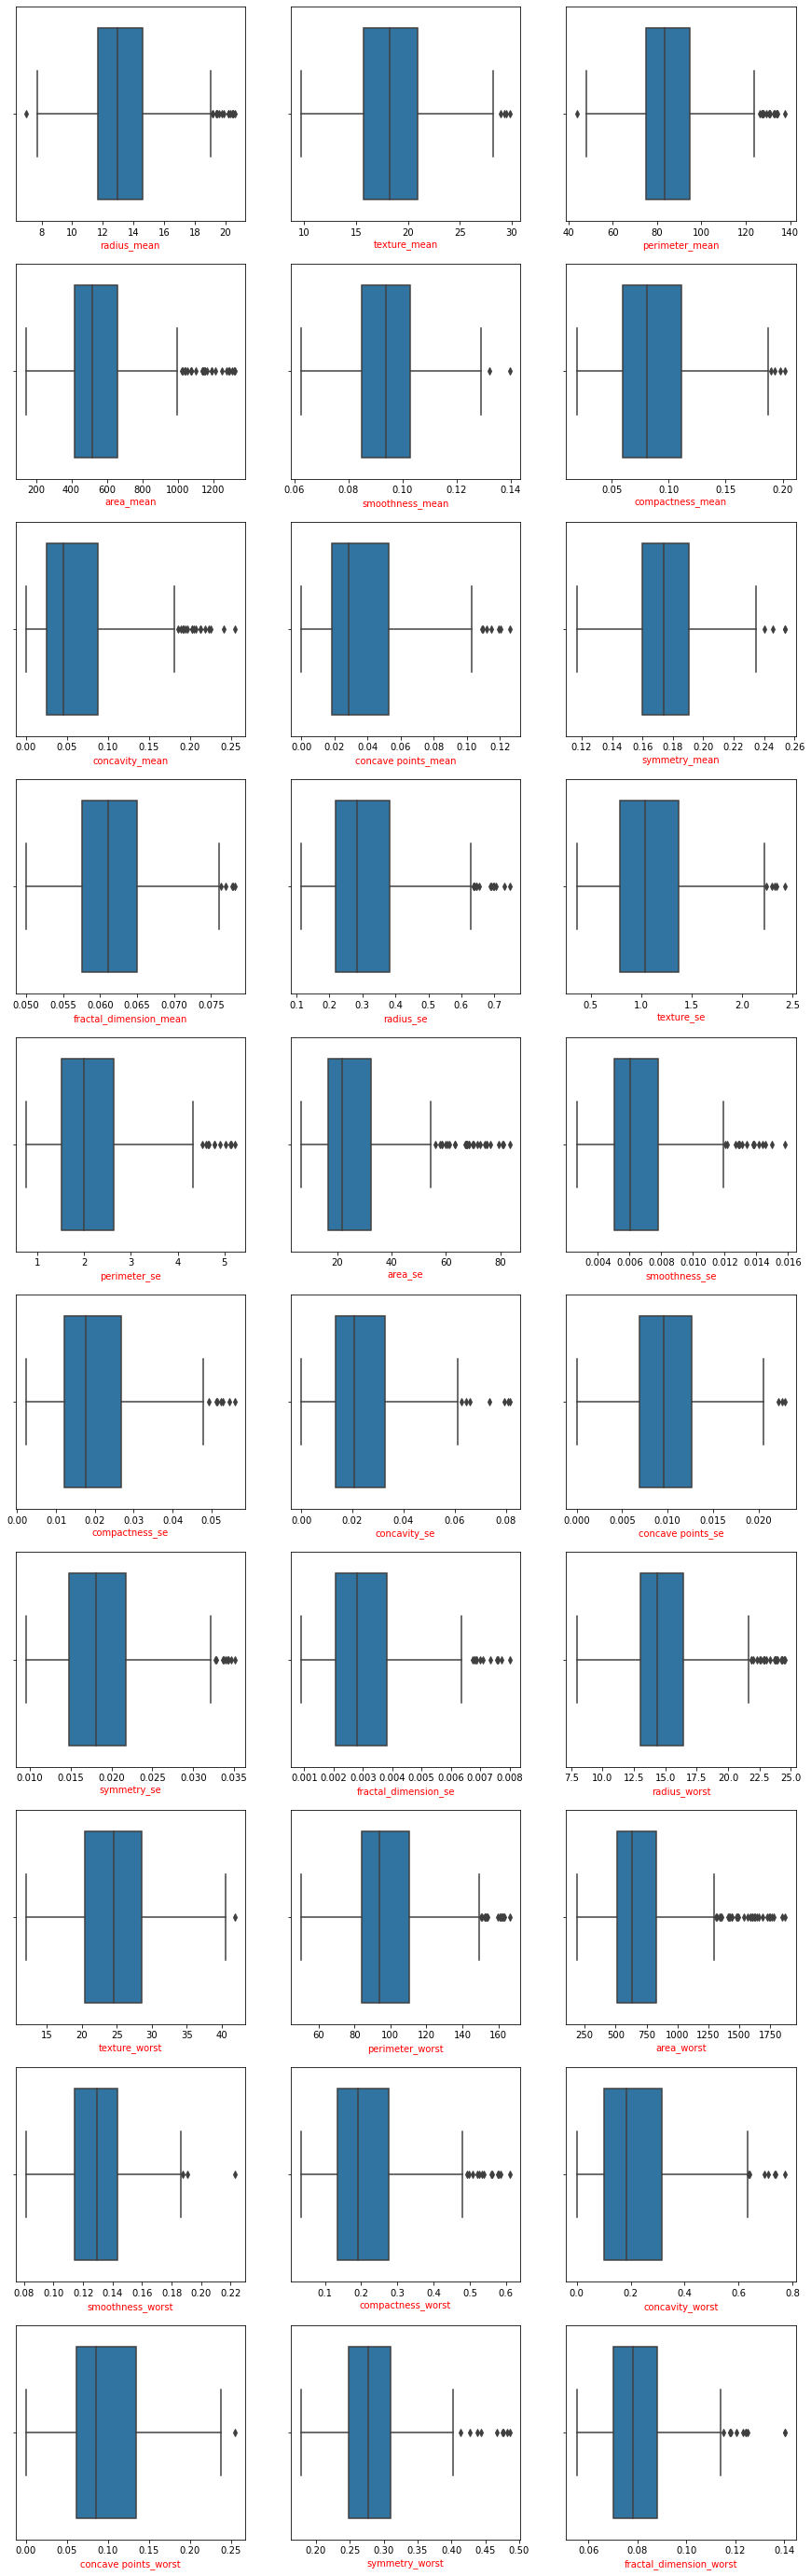

In [76]:
## let's plot data distribution

plt.figure(figsize=(15, 50))

graph = 1

for column in data:
    if graph <= 30:
        ax = plt.subplot(10,3,graph)
        sns.boxplot(data[column],orient='h')
        plt.xlabel(column,color ='r',fontsize = 10)
    graph+=1
plt.show()  

In [77]:
data['radius_mean'].head(84)

5      12.45
6      18.25
7      13.71
8      13.00
10     16.02
       ...  
115    11.93
117    14.87
118    15.78
120    11.41
123    14.50
Name: radius_mean, Length: 84, dtype: float64

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426 entries, 5 to 566
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              426 non-null    float64
 1   texture_mean             426 non-null    float64
 2   perimeter_mean           426 non-null    float64
 3   area_mean                426 non-null    float64
 4   smoothness_mean          426 non-null    float64
 5   compactness_mean         426 non-null    float64
 6   concavity_mean           426 non-null    float64
 7   concave points_mean      426 non-null    float64
 8   symmetry_mean            426 non-null    float64
 9   fractal_dimension_mean   426 non-null    float64
 10  radius_se                426 non-null    float64
 11  texture_se               426 non-null    float64
 12  perimeter_se             426 non-null    float64
 13  area_se                  426 non-null    float64
 14  smoothness_se            4